In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data.xlsx')

In [38]:
l = ['x1', 'x2', 'x3', 'x4', 'x5']

df[l] = df[l].map(lambda x: str(x).replace("\xa0", "") if isinstance(x, str) else str(x))
df[l] = df[l].map(lambda x: int(x) if x.isdigit() else -1)

df

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,NaN
2,Владимирская область,5802,8902,1703,1468,-1,сenter
3,Воронежская область,-1,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954,7211,929,977,829,dv
81,Магаданская область,787,1215,331,202,97,dv
82,Сахалинская область,3332,4511,792,507,131,dv
83,Еврейская автономная область,803,-1,175,187,57,dv


In [39]:
for col in df[l].columns:
    meanval = df[col][df[col] != -1].mean()
    df[col].replace(-1, meanval, inplace=True)

df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3220\3050096062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(-1, meanval, inplace=True)


,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.000000,14918.00,2825.0,2009.0,1841.000000,сenter
1,Брянская область,4560.000000,10211.00,1538.0,1418.0,837.000000,NaN
2,Владимирская область,5802.000000,8902.00,1703.0,1468.0,2169.903614,сenter
3,Воронежская область,7333.084337,17186.00,3362.0,2458.0,4347.000000,сenter
4,Ивановская область,4495.000000,5649.00,1338.0,977.0,1288.000000,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.000000,7211.00,929.0,977.0,829.000000,dv
81,Магаданская область,787.000000,1215.00,331.0,202.0,97.000000,dv
82,Сахалинская область,3332.000000,4511.00,792.0,507.0,131.000000,dv
83,Еврейская автономная область,803.000000,14787.75,175.0,187.0,57.000000,dv


In [40]:
df['Округ'].fillna(df['Округ'].value_counts().index[0], inplace=True)

df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3220\3445262309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Округ'].fillna(df['Округ'].value_counts().index[0], inplace=True)


,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.000000,14918.00,2825.0,2009.0,1841.000000,сenter
1,Брянская область,4560.000000,10211.00,1538.0,1418.0,837.000000,сenter
2,Владимирская область,5802.000000,8902.00,1703.0,1468.0,2169.903614,сenter
3,Воронежская область,7333.084337,17186.00,3362.0,2458.0,4347.000000,сenter
4,Ивановская область,4495.000000,5649.00,1338.0,977.0,1288.000000,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.000000,7211.00,929.0,977.0,829.000000,dv
81,Магаданская область,787.000000,1215.00,331.0,202.0,97.000000,dv
82,Сахалинская область,3332.000000,4511.00,792.0,507.0,131.000000,dv
83,Еврейская автономная область,803.000000,14787.75,175.0,187.0,57.000000,dv


In [41]:
df.isnull().sum()

Unnamed: 0    0
x1            0
x2            0
x3            0
x4            0
x5            0
Округ         0
dtype: int64

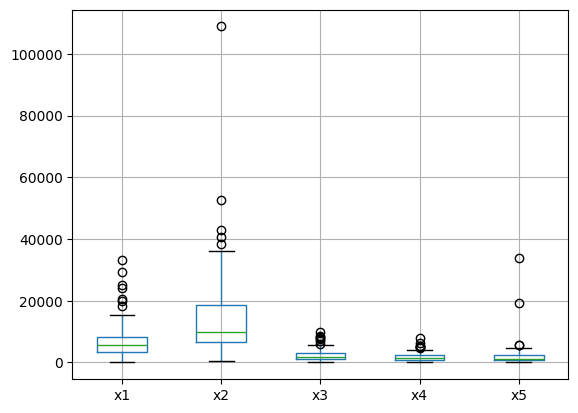

In [42]:
df.boxplot()
plt.show()

In [43]:
for _ in l:
    a = df[_].quantile(0.25)
    b = df[_].quantile(0.75)
    medianval = df[_].median()
    df[_] = df[_].apply(lambda x: medianval if (x < a or x > b) else x)

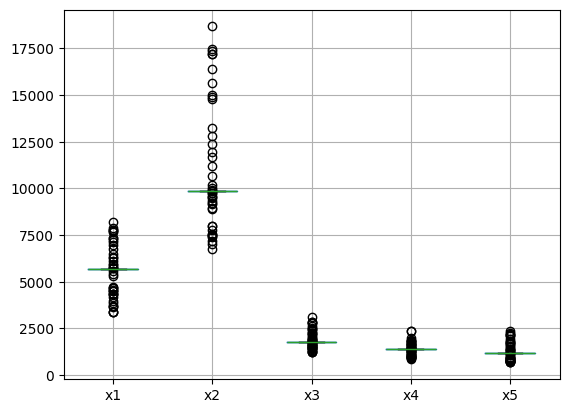

In [44]:
df.boxplot()
plt.show()